In [24]:
"""INSTALLATION DE PANDAS ET DE PROPHET"""
!pip install pandas
!pip install prophet
!pip install seaborn

In [41]:
#Importation des différentes librairies et chech de leur version
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("Pandas version : " + str(pd.__version__))
print("Seaborn version : "+ str(sns.__version__))

Pandas version : 2.1.4
Seaborn version : 0.13.0


In [28]:
#Chargement du dateset pour l'EDA
dataset_path = 'jour_2024-01-09_au_2024-02-26.csv'
energy_dataset= pd.read_csv(dataset_path, sep=';',  encoding='latin1')

In [29]:
#Affichage des informations contenues dans le dataset (colonnes, types de colonnes, nombres de variable)
energy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Contrat                   49 non-null     int64 
 1   Tarif                     49 non-null     object
 2   Date                      49 non-null     object
 3   kWh                       49 non-null     object
 4   Code de consommation      49 non-null     object
 5   Température moyenne (°C)  49 non-null     int64 
 6   Code de température       49 non-null     object
dtypes: int64(2), object(5)
memory usage: 2.8+ KB


In [32]:
# Le contrat étant une info sensible, il sera enlevé par précaution
energy_dataset = energy_dataset.drop(columns=['Contrat'])
energy_dataset.head()

,Tarif,Date,kWh,Code de consommation,Température moyenne (°C),Code de température
0,D,2024-02-26,"26,05",R,2,R
1,D,2024-02-25,"32,04",R,-4,R
2,D,2024-02-24,"33,65",R,-12,R
3,D,2024-02-23,"24,39",R,1,R
4,D,2024-02-22,"25,56",R,2,R


In [34]:
# Transfomation de la consomation en kWh en valeur numérique et de la date en type date 
#Supprimer les lignes contenant NaN
energy_dataset = energy_dataset.dropna(axis=0, how='any')
energy_dataset['Date'] = pd.to_datetime(energy_dataset['Date'])
energy_dataset['kWh'] = energy_dataset['kWh'].str.replace(',', '.').astype('float64')

#Affichage pour voir l'effectivité des changements opérés
energy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Tarif                     49 non-null     object        
 1   Date                      49 non-null     datetime64[ns]
 2   kWh                       49 non-null     float64       
 3   Code de consommation      49 non-null     object        
 4   Température moyenne (°C)  49 non-null     int64         
 5   Code de température       49 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.4+ KB


In [42]:
# Statistiques sur les colonnes Kwh et Température 
energy_dataset.describe(include=[np.number])

,kWh,Température moyenne (°C)
count,49.000000,49.000000
mean,31.221837,-4.142857
std,5.434641,4.685972
min,17.210000,-14.000000
25%,27.440000,-7.000000
50%,30.410000,-4.000000
75%,34.870000,0.000000
max,44.300000,5.000000


In [43]:
#Statistiques sur la colonne Date
energy_dataset.Date.describe()

count                     49
mean     2024-02-02 00:00:00
min      2024-01-09 00:00:00
25%      2024-01-21 00:00:00
50%      2024-02-02 00:00:00
75%      2024-02-14 00:00:00
max      2024-02-26 00:00:00
Name: Date, dtype: object

In [ ]:
energy_dataset.info()

(array([19730., 19737., 19744., 19754., 19761., 19768., 19775.]),
 [Text(19730.0, 0, '2024-01-08'),
  Text(19737.0, 0, '2024-01-15'),
  Text(19744.0, 0, '2024-01-22'),
  Text(19754.0, 0, '2024-02-01'),
  Text(19761.0, 0, '2024-02-08'),
  Text(19768.0, 0, '2024-02-15'),
  Text(19775.0, 0, '2024-02-22')])

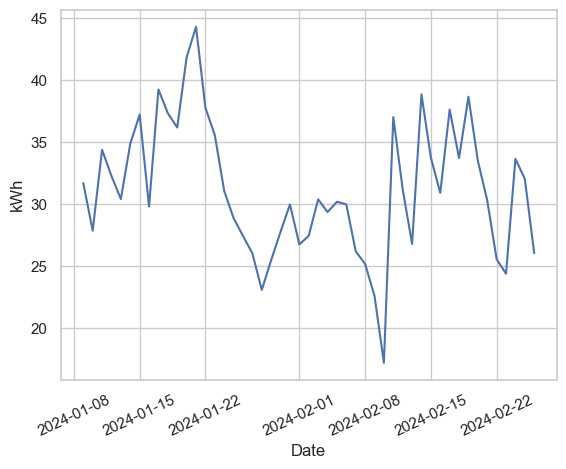

In [44]:
#Présentation de l'évolution de la consommation au fil du temps
sns.set_theme(style="whitegrid")
sns.lineplot(x='Date', y='kWh', data=energy_dataset)
plt.xticks(rotation = 25)

(array([19730., 19737., 19744., 19754., 19761., 19768., 19775.]),
 [Text(19730.0, 0, '2024-01-08'),
  Text(19737.0, 0, '2024-01-15'),
  Text(19744.0, 0, '2024-01-22'),
  Text(19754.0, 0, '2024-02-01'),
  Text(19761.0, 0, '2024-02-08'),
  Text(19768.0, 0, '2024-02-15'),
  Text(19775.0, 0, '2024-02-22')])

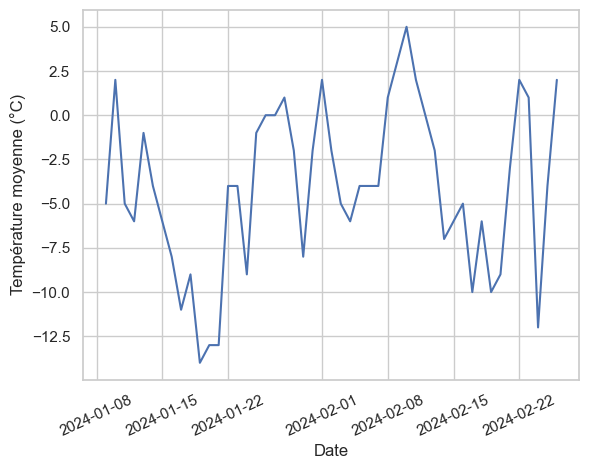

In [45]:
#Présentation de l'évolution de la température au fil du temps
sns.set_theme(style="whitegrid")
sns.lineplot(x='Date', y='Température moyenne (°C)', data=energy_dataset)
plt.xticks(rotation = 25)

<Axes: xlabel='Température moyenne (°C)', ylabel='kWh'>

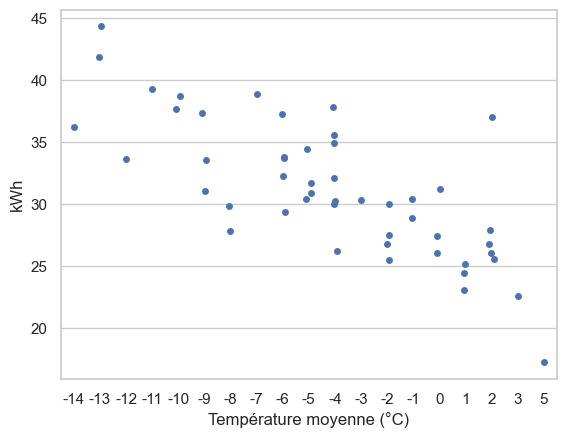

In [50]:
#Lien entre la température et la consommation d'énergie.
#On peut remarquer que plus la température est basse et plus on consomme
sns.stripplot(data=energy_dataset, y='kWh', x='Température moyenne (°C)')

In [ ]:
"""
energy_dataset_for_kwh = energy_dataset.copy()
energy_dataset_for_kwh = ernergy_dataset_for_kwh.drop(columns = ['Tarif', 'Code de consommation', 'Température moyenne (°C)', 'Code de température'], axis=1)
"""

In [ ]:
# Forecast exploration

In [ ]:
#Work in progress
energy_dataset = energy_dataset.loc[::-1].reset_index(drop=True)
energy_dataset.tail()

In [ ]:
from prophet import Prophet

In [ ]:
m = Prophet()
energy_dataset.columns = ['ds', 'y']
m.fit(energy_dataset.iloc[:40])

In [ ]:
future_consumption_date = m.make_future_dataframe(periods=10)
future_consumption_date.tail(10)

In [ ]:
forecast = m.predict(future_consumption_date)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)